# **Proyek UAS Data Science**



> Nama : Laila Maulin Ni'mah

> Nim  : A11.2022.14424

> Kelompok : DS03






# **LANGKAH 1 - IMPORT LIBRARY**

---







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing dan Modeling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# **LANGKAH 2 - LOAD DATASET**

---



In [ ]:
# Ganti path berikut jika perlu
df = pd.read_csv('/content/ObesityDataSet.csv')

# Lihat 5 data teratas
df.head()


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


# **LANGKAH 3 - EDA (Exploratory Data Analysis)**

---



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

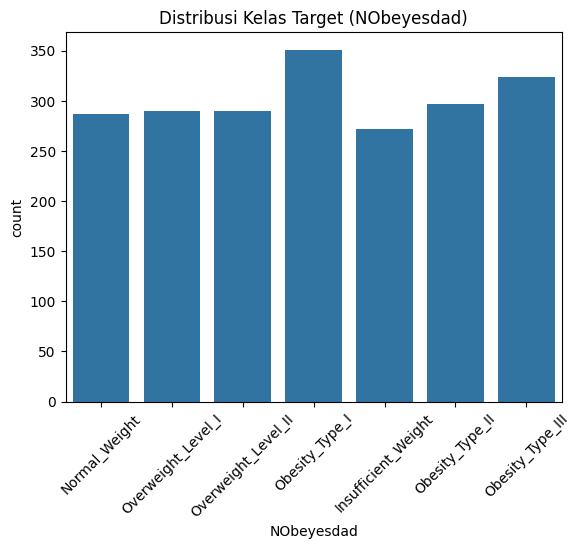

In [ ]:
# Info data
df.info()

# Statistik deskriptif
df.describe()

# Distribusi target
print(df['NObeyesdad'].value_counts())
sns.countplot(data=df, x='NObeyesdad')
plt.xticks(rotation=45)
plt.title('Distribusi Kelas Target (NObeyesdad)')
plt.show()


# **LANGKAH 4 - DATA CLEANING**

---



In [ ]:
# Cek missing value
print(df.isnull().sum())

# Cek duplikasi
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

# Hapus duplikat jika ada
df = df.drop_duplicates()


Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64
Jumlah data duplikat: 18


# **LANGKAH 5 - PREPROCESSING (ENCODING & SCALING)**

---



In [ ]:
# Label Encoding untuk kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Pisahkan fitur dan target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Normalisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)


# **LANGKAH 6 - SPLIT DATA**

---



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **LANGKAH 7 - COMPARING BERBAGAI MODEL**

---



In [ ]:
# Inisialisasi model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC()
}

# Menyimpan hasil evaluasi
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Evaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    results['F1-Score'].append(f1_score(y_test, y_pred, average='weighted'))

    print(f"\n=== Model: {name} ===")
    print(classification_report(y_test, y_pred, zero_division=0))



=== Model: Logistic Regression ===
              precision    recall  f1-score   support

           0       0.60      0.59      0.59        56
           1       0.34      0.25      0.29        57
           2       0.39      0.47      0.43        70
           3       0.78      0.82      0.80        72
           4       0.92      0.97      0.94        58
           5       0.35      0.33      0.34        51
           6       0.46      0.45      0.46        55

    accuracy                           0.57       419
   macro avg       0.55      0.55      0.55       419
weighted avg       0.56      0.57      0.56       419


=== Model: Decision Tree ===
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        56
           1       0.84      0.74      0.79        57
           2       0.91      0.86      0.88        70
           3       0.95      0.96      0.95        72
           4       0.97      0.98      0.97        58
           5

# **LANGKAH 8 - VISUALISASI HASIL COMPARING**


=== Hasil Perbandingan Model ===
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.565632   0.556634  0.565632  0.559239
1        Decision Tree  0.878282   0.880399  0.878282  0.878296
2        Random Forest  0.937947   0.943302  0.937947  0.939121
3          Naive Bayes  0.582339   0.595295  0.582339  0.566695
4                  SVM  0.739857   0.765178  0.739857  0.746354


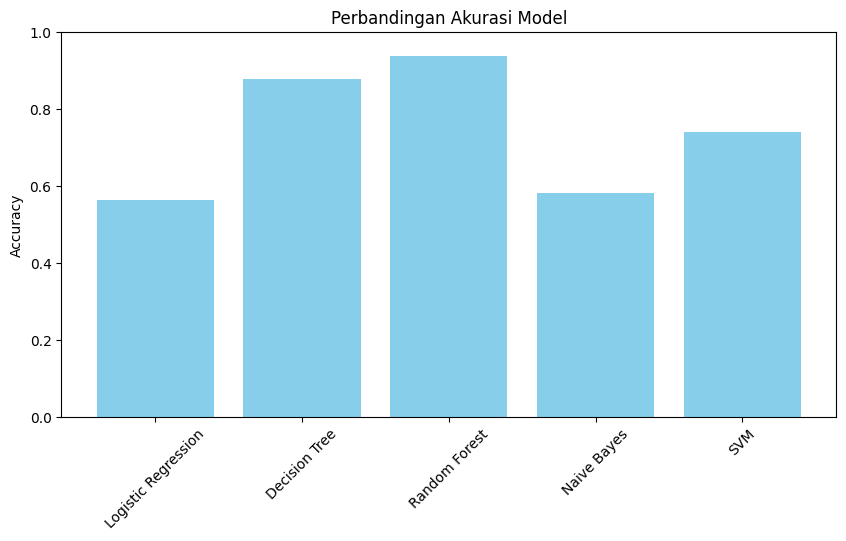

In [ ]:
results_df = pd.DataFrame(results)

# Tampilkan hasil perbandingan
print("\n=== Hasil Perbandingan Model ===")
print(results_df)

# Visualisasi akurasi
plt.figure(figsize=(10,5))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()
